In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
!pip install alibi

# Load the ResNet50 model pre-trained on ImageNet
model = ResNet50(weights='imagenet')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to decode and display predictions
def predict_and_display(img_path):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    print('Predicted:', decode_predictions(preds, top=3)[0])

    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image
from alibi.explainers import AnchorImage
import time

predict_fn = lambda x: model.predict(x)
segmentation_fn = 'slic'
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5, 'start_label': 0}
explainer = AnchorImage(predict_fn, image_shape = (224, 224, 3), segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

# Load and preprocess the image
img = keras_image.load_img('pineapple.jpg', target_size=(224, 224, 3))
img_array = keras_image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

triples = [
    # (0.90, 0.05, 0.15),
    # (0.95, 0.10, 0.10),
    (0.85, 0.01, 0.05)
]

# Placeholder for explanations and execution times
explanations = []
execution_times = []

# Iterate over the triples and measure the execution time
for t, delta, tau in triples:
    np.random.seed(0)
    start_time = time.time()

    explanation = explainer.explain(img_array[0], threshold=t, p_sample=delta, tau=tau)

    end_time = time.time()
    execution_time = end_time - start_time

    explanations.append(explanation)
    execution_times.append(execution_time)
    print(f"Execution time for (threshold={t}, delta={delta}, tau={tau}): {execution_time} seconds")

4/4 [==============================] - 0s 105ms/step
Execution time for (threshold=0.85, delta=0.01, tau=0.05): 0.9520182609558105 seconds


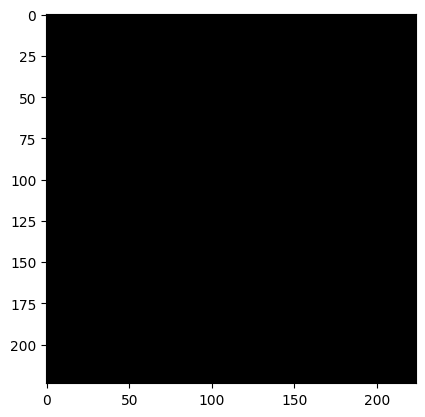

In [ ]:
plt.imshow(explanation.anchor);

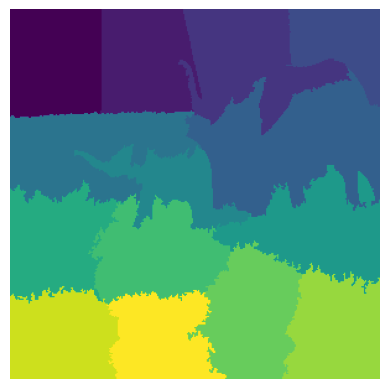

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(explanation.segments)
plt.axis('off')  # Hide axes

plt.imshow(img, alpha = 0)

plt.show()